In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
files = ['cnn_trad_fpool3.csv','C64.csv','TCResNet8.csv', 'TCResNetDilated.csv']
labels =['cnn_trad_fpool3','C64','TCResNet8', 'TDResNet8']

In [3]:
results = [pd.read_csv(file) for file in files]

In [4]:
way = 4 # N-Way classification to compare

In [5]:
results = [df[df['train.way'] == way] for df in results]

In [6]:
shots = sorted(results[0]['train.shot'].unique())
print(shots)

[1, 5, 10, 15, 20]


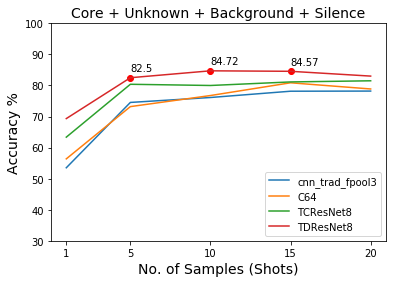

In [7]:
include_background = True
include_silence = True
include_unknown = True
title = 'core'

fig = plt.figure()
ax = fig.add_subplot(111)

for i, df in enumerate(results):
    df = df[(df['background'] == include_background) & 
             (df['silence'] == include_silence) & 
             (df['unknown'] == include_unknown)][['test.shot','test.acc.mean']]

    acc = df.sort_values('test.shot')['test.acc.mean'].values
    acc = [y * 100 for y in acc]
    ax.plot(shots, acc, label=labels[i])
    
marker_shots = [5,10,15]
marker_acc =  [y for x,y in zip(shots, acc) if x in marker_shots]
ax.scatter(marker_shots, marker_acc, marker='o', color='r')

for x, y in zip(marker_shots, marker_acc):
    ax.annotate(str(round(y,2)), (x, y+2))

#ax.set_title('{}-Way Few-Shot Keyword Spotting'.format(way, title),fontsize=14)
ax.set_title('Core + Unknown + Background + Silence', fontsize=14)
ax.set_ylabel('Accuracy %', fontsize=14)
ax.set_xlabel('No. of Samples (Shots)',fontsize=14)
ax.set_xticks(shots)
_ = ax.set_yticks(np.linspace(30,100,8))
_ = ax.legend(loc='lower right')

plt.savefig('performance-Core+Unknown+Background+Silence.png', bbox_inches = "tight")